## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.21.3


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1231629  #insert your ID number here
np.random.seed(ID)

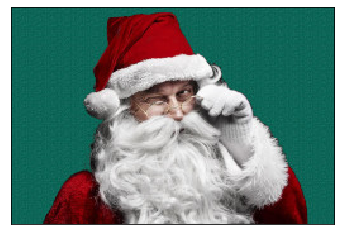

Santa Claus image:  (172, 256, 3)


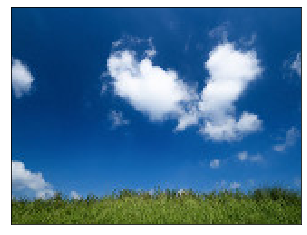

Landscape image:  (120, 160, 3)


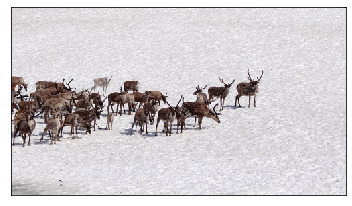

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


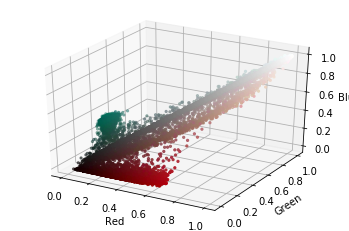

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def my_kmeans(points, k):
    
    max_iters=50
    
    # centroids initialization and closest centroid
    mean = np.mean(points, axis = 0)
    std = np.std(points, axis = 0)
    centroids = np.random.rand(k,points.shape[1])*std + mean
    previous_centroids = np.random.rand(k,points.shape[1])
    
    clusters = np.zeros(points.shape[0])
    error = []
    
    for i in range(max_iters):
        
        distances = sp.spatial.distance.cdist(points,centroids, 'euclidean')
        clusters = np.argmin(distances, axis = 1)
        
        previous_centroids = deepcopy(centroids)

        for j in range(k):
            centroids[j] = np.mean(points[clusters == j], axis=0)

        e = 0
        for j in range(points.shape[0]):
            e += distances[j,clusters[j]]**2.0
        
        error.append(e)
        if np.array_equal(previous_centroids,centroids):
            print("Algorithm converged after",str(i+1),"iterations")
            break
    
    return centroids, clusters, error

## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

Algorithm converged after 15 iterations


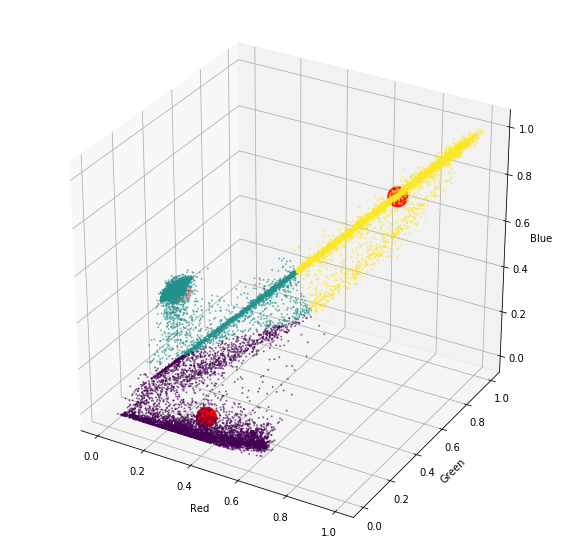

In [7]:
mykmeans_centers,clusters,error = my_kmeans(data, 3)

fig = pyplot.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

Text(0, 0.5, 'Error')

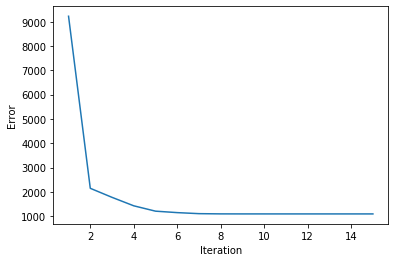

In [8]:
plt.plot(range(1,len(error)+1),error)
plt.xlabel("Iteration")
plt.ylabel("Error")# ADD YOUR CODE

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [9]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(data) # ADD YOUR CODE

# ADD YOUR CODE
print("Algorithm converged after",kmeans.n_iter_,"iterations")

Algorithm converged after 4 iterations


### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

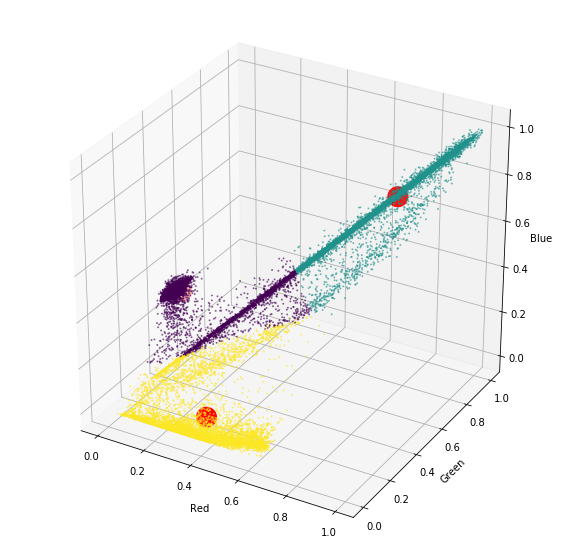

In [10]:
fig = pyplot.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=kmeans.predict(data), s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

[ADD YOUR ANSWER HERE]

The results are a bit different in the two cases. The order of the colours is different, however the shapes of the coloured zones are practically the same. Concerning the performances, the algorithm from sklearn converges after 4 iterations, while my implementation after 15 iterations (the number can change by changing the seed). So the algorithm from sklearn performs better for this task.

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

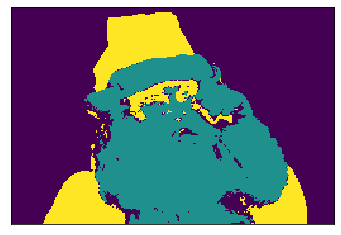

In [11]:
image_sklearn = deepcopy(kmeans.labels_.reshape(image1.shape[0], image1.shape[1]))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image_sklearn);
plt.show()
# ADD CODE TO DISPLAY THE IMAGE OBTAINED USING SKLEARN 

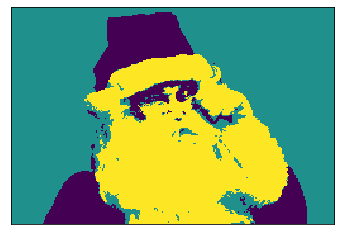

In [12]:
image_mycode = deepcopy(clusters.reshape(image1.shape[0], image1.shape[1]))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image_mycode);
plt.show()
# ADD CODE TO DISPLAY THE IMAGE OBTAINED WITH YOUR CODE

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

[ADD YOUR ANSWER HERE]

I observe results that are quite similar, except for the color representing the clusters. The image segmentation applied in this case is quite simple but it is successful in both cases. So I think clustering is useful for image segmentation. Concerning image compression, clustering could be useful to keep the most relevant informations of the dataset, in this case the pixels of an image.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)


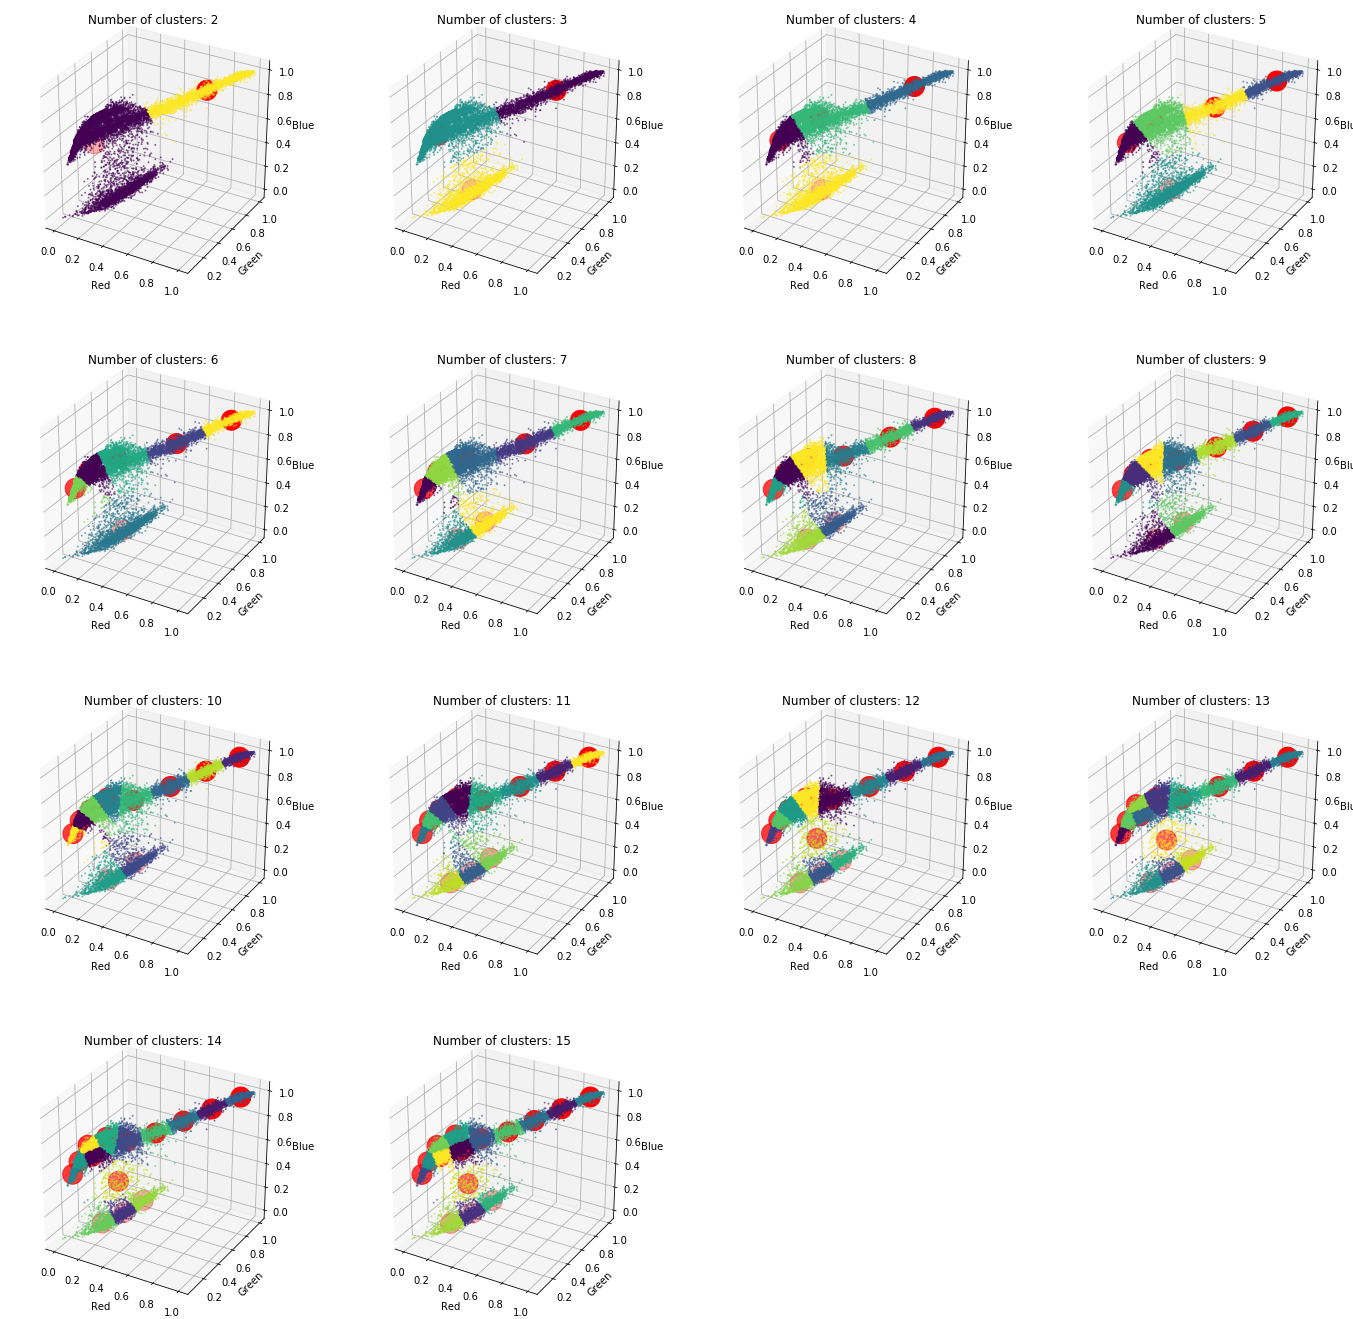

In [13]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])
print(data.shape)

kmeans = []

fig = pyplot.figure(figsize=(24,24))
for k in range(2,16):
    kmeans.append(KMeans(n_clusters=k, n_init=10).fit(data))
    
    axis = fig.add_subplot(4, 4, k-1, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title("Number of clusters: " + str(k))
    axis.scatter(r, g, b, marker="o", c=kmeans[k-2].predict(data), s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans[k-2].cluster_centers_[:,0], kmeans[k-2].cluster_centers_[:,1], kmeans[k-2].cluster_centers_[:,2], c='red', s=400, zorder=10)

pyplot.show()
# ADD YOUR CODE

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

Text(0, 0.5, 'Error')

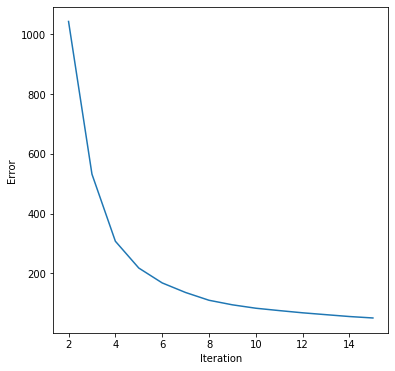

In [14]:
fig = pyplot.figure(figsize=(6,6))
# np.linalg.norm(centroids - previous_centroids
error = [kmeans[i].inertia_ for i in range(0,len(kmeans))]

plt.plot(range(2,16),error)
plt.xlabel("Iteration")
plt.ylabel("Error")
# ADD YOUR CODE FOR PLOTTING

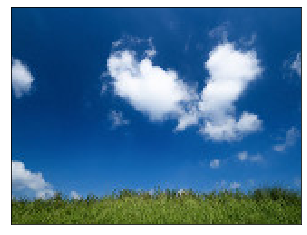

Landscape image:  (120, 160, 3)


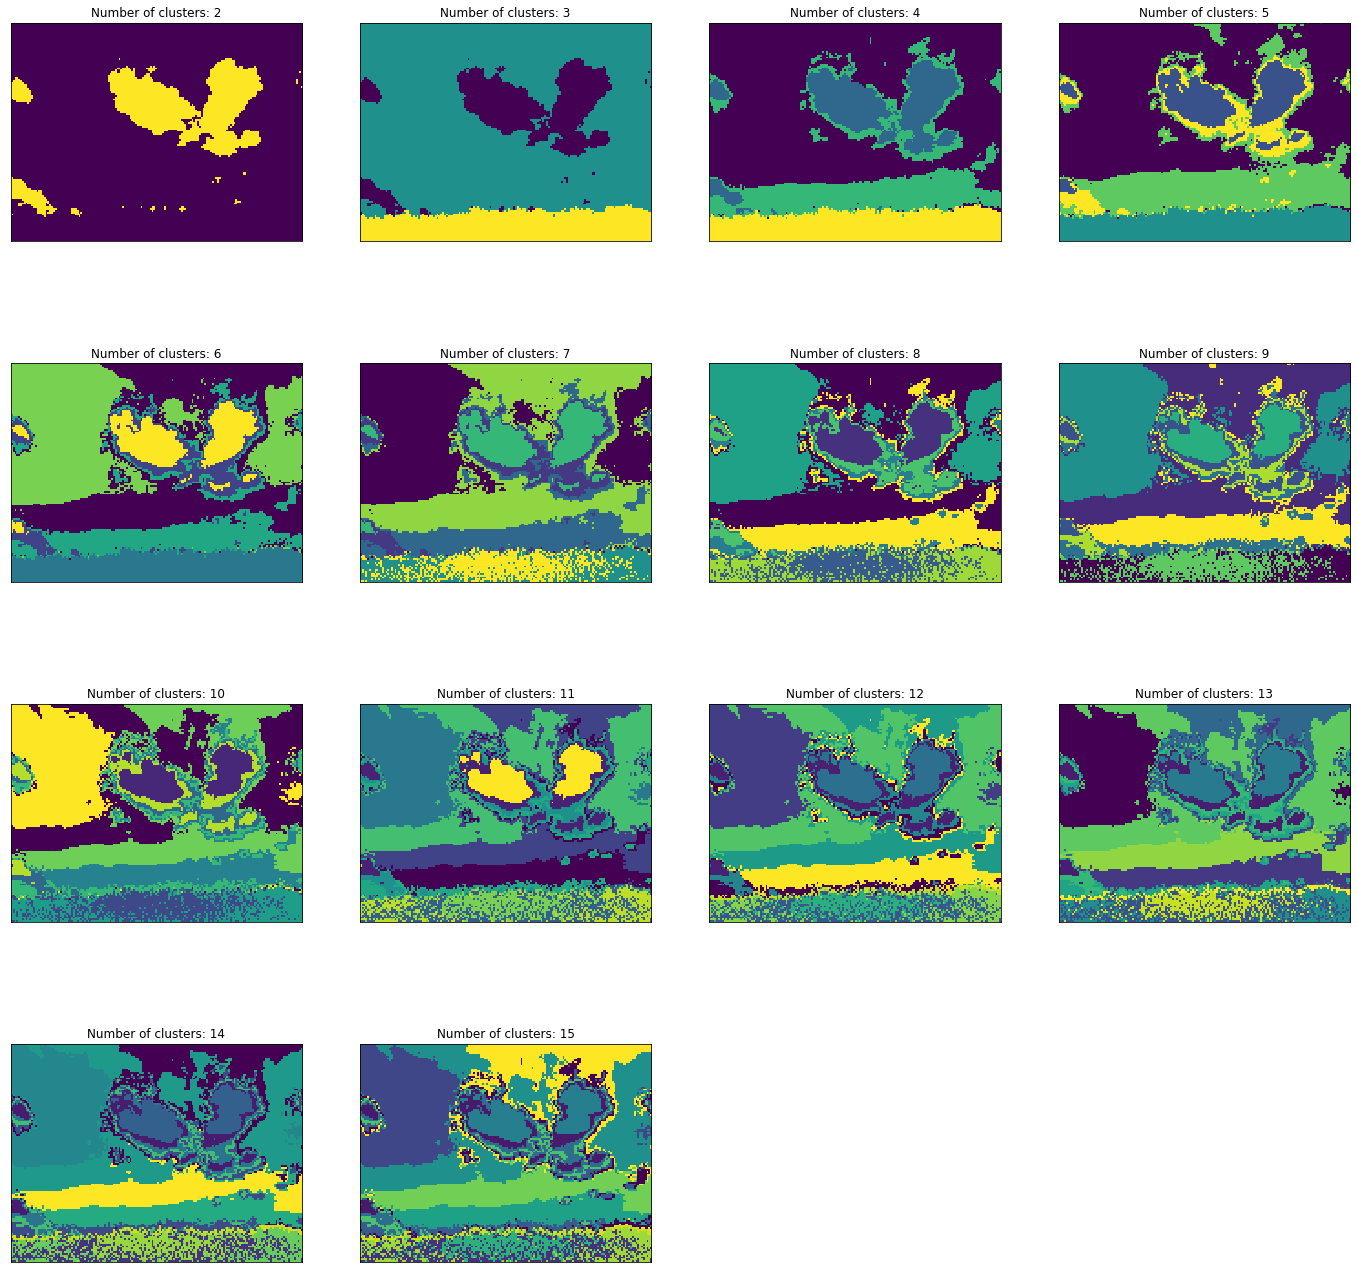

In [15]:
ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

fig = pyplot.figure(figsize=(24,24))

for k in range(2,16):
    image_sklearn = deepcopy(kmeans[k-2].labels_.reshape(image2.shape[0], image2.shape[1]))
    axis = fig.add_subplot(4, 4, k-1)
    axis.set_title("Number of clusters: " + str(k))
    axis.set_xticks([])
    axis.set_yticks([])
    # plt.axes(xticks=[], yticks=[])
    axis.imshow(image_sklearn);
    # ax = plt.axes(xticks=[], yticks=[])
    # ax.imshow(image_sklearn);
    # plt.show()
    
    # axis = fig.add_subplot(4, 4, k-1)
    # axis.set_title("Number of clusters: " + str(k))
    # axis.axes(xticks=[], yticks=[])
    # axis.imshow(image_sklearn);

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

[ADD YOUR ANSWERS HERE]

By increasing the number of clusters, the algorithm can distinguish more properties and details in the image. However, if the number of $k$ becomes too big, the algorithm starts to recognize as different clusters details of the image which are of the same class but with some little differences.
Concerning the error, it becomes smaller when the number of clusters increases. This is obvious since the l2 norm penalizes big distances and inserting new centroids in general makes the distances between points and centroids shorter.
Lastly, the optimal value of $k$ is "in the middle" since few clusters can't recognize too much details, too many clusters lead to the problem explained in the beginning of the answer. There is not a clear answer, however in literature it is suggested to take as the optimal number of $k$ the one corresponding to the "elbow" of the error curve.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [16]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [17]:
# #############################################################################
# Compute Agglomerative Clustering
print(X[1])
db = AgglomerativeClustering(n_clusters=2, linkage="single").fit(X)#,labels_true) #....

[-1.05205683  1.21547148]


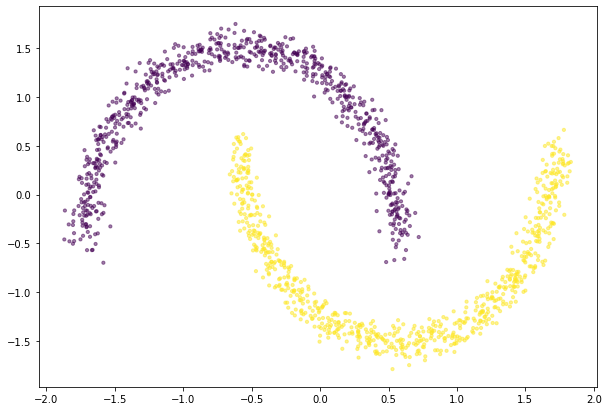

In [18]:
# Plot result

# ADD YOUR CODE
fig = pyplot.figure(figsize=(10,7))
axis = fig.add_subplot(1, 1, 1)
axis.scatter(X[:,0], X[:,1], marker="o", c=db.fit_predict(X), s=10, cmap='viridis', zorder=0, alpha=0.5 )
# axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

In [19]:
# ADD YOUR CODE
kmeans = KMeans(n_clusters=2, n_init=10).fit(X)#,labels_true)

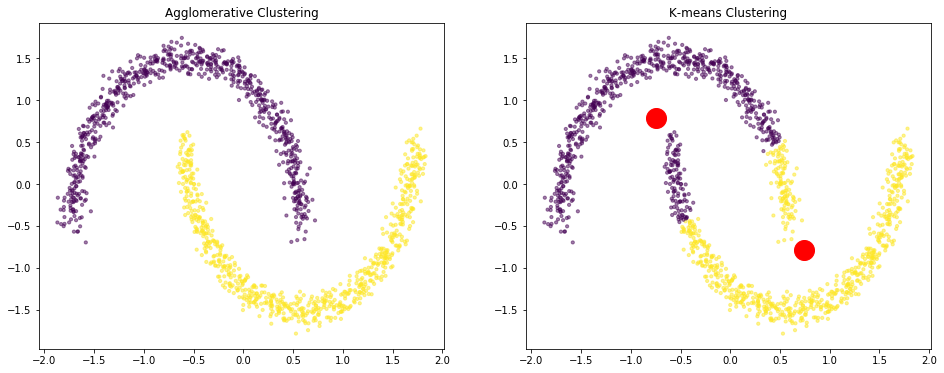

In [20]:
fig = pyplot.figure(figsize=(16,6))

axis = fig.add_subplot(1, 2, 1)
axis.scatter(X[:,0], X[:,1], marker="o", c=db.fit_predict(X), s=10, cmap='viridis', zorder=0, alpha=0.5 )
axis.set_title("Agglomerative Clustering")
# axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)

axis = fig.add_subplot(1, 2, 2)
axis.scatter(X[:,0], X[:,1], marker="o", c=kmeans.fit_predict(X), s=10, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=400, zorder=10)
axis.set_title("K-means Clustering")
pyplot.show()

## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



[ADD YOUR ANSWER HERE]

The results are quite different in the two cases. Agglomerative Clustering successfully distinguishes the two shapes. K-means clustering does it with a defect: it recognizes as part of a cluster a piece of the shape of the other cluster. This is due to the operations done in the algorithms and to their definintion itself.

In conclusion, I think that the Agglomerative Clustering performs better than K-means Clustering for these task and dataset.